In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
coordinates = list(lat_lngs)


In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
    

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [11]:
import requests
# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
query_url = url + "&q=" + "Boston"

In [ ]:
print(query_url)

In [22]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [26]:
if weather_response.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [27]:
boston_data = weather_response.json()

In [30]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 39.15 41 20 12.66


In [31]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 11, 21, 18, 17, 39)

In [32]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-11-21 18:17:39'

In [33]:
import time


In [40]:
cities[1]

'bellary'

In [45]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities): #len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | bellary
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | mogadishu
Processing Record 6 of Set 1 | kegayli
City not found. Skipping...
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | high level
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | barkly west
Processing Record 16 of Set 1 | mayumba
Processing Record 17 of Set 1 | kulhudhuffushi
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21

Processing Record 37 of Set 4 | jiaocheng
Processing Record 38 of Set 4 | vila franca do campo
Processing Record 39 of Set 4 | callaway
Processing Record 40 of Set 4 | kholm-zhirkovskiy
Processing Record 41 of Set 4 | rajshahi
Processing Record 42 of Set 4 | northam
Processing Record 43 of Set 4 | muros
Processing Record 44 of Set 4 | gao
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | bilma
Processing Record 47 of Set 4 | cabatuan
Processing Record 48 of Set 4 | salitrillo
Processing Record 49 of Set 4 | pozzallo
Processing Record 50 of Set 4 | new norfolk
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | shitanjing
Processing Record 6 of Set 5 | bonthe
Processing Record 7 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 8 of Set 5 | faanui
Processing Record 9 of Set 5

Processing Record 25 of Set 8 | miri
Processing Record 26 of Set 8 | batsfjord
Processing Record 27 of Set 8 | mitsamiouli
Processing Record 28 of Set 8 | payo
Processing Record 29 of Set 8 | kamaishi
Processing Record 30 of Set 8 | bikaner
Processing Record 31 of Set 8 | honningsvag
Processing Record 32 of Set 8 | kieta
Processing Record 33 of Set 8 | veraval
Processing Record 34 of Set 8 | yeppoon
Processing Record 35 of Set 8 | burns lake
Processing Record 36 of Set 8 | la ronge
Processing Record 37 of Set 8 | kuytun
Processing Record 38 of Set 8 | illapel
Processing Record 39 of Set 8 | champerico
Processing Record 40 of Set 8 | sawakin
Processing Record 41 of Set 8 | thompson
Processing Record 42 of Set 8 | grand gaube
Processing Record 43 of Set 8 | concordia
Processing Record 44 of Set 8 | batticaloa
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | saint anthony
Processing Record 47 of Set 8 | lushunkou
City not found. Skipping...
Processing Record 48 of Se

Processing Record 16 of Set 12 | kimberley
Processing Record 17 of Set 12 | camacha
Processing Record 18 of Set 12 | forbes
Processing Record 19 of Set 12 | zonguldak
Processing Record 20 of Set 12 | newton stewart
Processing Record 21 of Set 12 | kocerinovo
City not found. Skipping...
Processing Record 22 of Set 12 | zhob
Processing Record 23 of Set 12 | amloh
Processing Record 24 of Set 12 | loa janan
Processing Record 25 of Set 12 | satipo
Processing Record 26 of Set 12 | kushiro
Processing Record 27 of Set 12 | beroroha
Processing Record 28 of Set 12 | havoysund
Processing Record 29 of Set 12 | lima
Processing Record 30 of Set 12 | artyk
City not found. Skipping...
Processing Record 31 of Set 12 | chissamba
Processing Record 32 of Set 12 | kumylzhenskaya
Processing Record 33 of Set 12 | nizhniy baskunchak
Processing Record 34 of Set 12 | krasnousolskiy
City not found. Skipping...
Processing Record 35 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 3

In [46]:
len(city_data)

574

In [47]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,8.08,95,81,6.08,GL,2022-11-21 19:06:52
1,Bellary,15.1500,76.9333,66.76,81,100,5.39,IN,2022-11-21 19:02:29
2,Rikitea,-23.1203,-134.9692,72.03,85,92,11.01,PF,2022-11-21 19:06:53
3,Mogadishu,2.0371,45.3438,79.30,78,11,10.94,SO,2022-11-21 19:06:53
4,Saint-Philippe,-21.3585,55.7679,74.79,78,13,4.79,RE,2022-11-21 19:06:54
5,Nikolskoye,59.7035,30.7861,19.29,90,89,4.25,RU,2022-11-21 19:06:54
6,Hilo,19.7297,-155.0900,74.93,82,75,6.91,US,2022-11-21 19:06:54
7,Atuona,-9.8000,-139.0333,77.50,67,11,17.45,PF,2022-11-21 19:06:55
8,Alofi,-19.0595,-169.9187,77.52,76,100,18.05,NU,2022-11-21 19:06:55
9,High Level,58.5169,-117.1360,31.08,81,6,2.26,CA,2022-11-21 19:05:09


In [49]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-11-21 19:06:52,72.7868,-56.1549,8.08,95,81,6.08
1,Bellary,IN,2022-11-21 19:02:29,15.1500,76.9333,66.76,81,100,5.39
2,Rikitea,PF,2022-11-21 19:06:53,-23.1203,-134.9692,72.03,85,92,11.01
3,Mogadishu,SO,2022-11-21 19:06:53,2.0371,45.3438,79.30,78,11,10.94
4,Saint-Philippe,RE,2022-11-21 19:06:54,-21.3585,55.7679,74.79,78,13,4.79
...,...,...,...,...,...,...,...,...,...
569,Biograd Na Moru,HR,2022-11-21 19:22:02,43.9433,15.4519,49.75,70,10,8.46
570,Dalton,US,2022-11-21 19:22:03,34.7698,-84.9702,57.06,29,0,5.75
571,Great Bend,US,2022-11-21 19:22:03,38.3645,-98.7648,57.61,23,0,4.61
572,Palasa,IN,2022-11-21 19:22:03,18.7667,84.4167,73.24,67,84,5.23


In [50]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [52]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1669059197.5582592

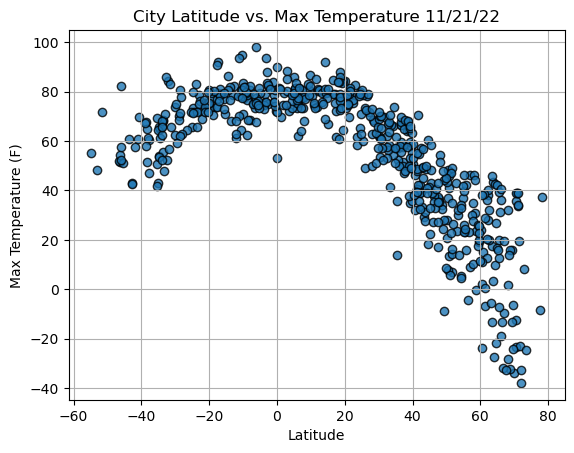

In [53]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

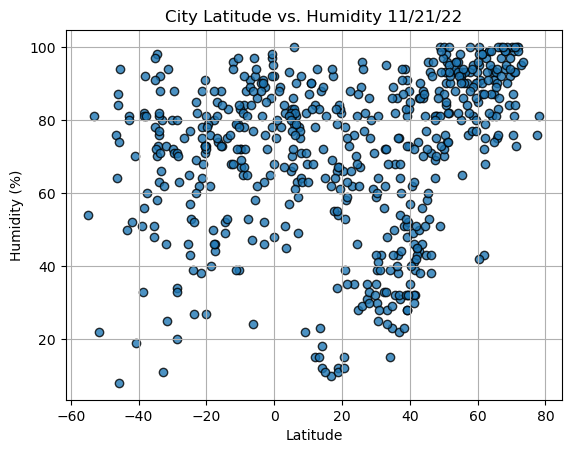

In [54]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

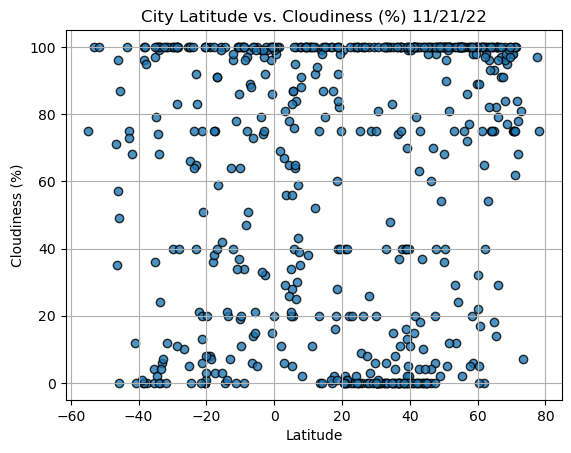

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

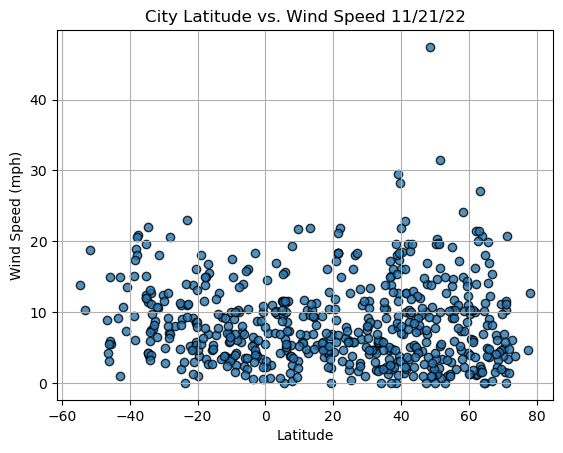

In [56]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()